In [1]:
from genome import PolynomialGenome
from neatGenome import NeatGenome
from geneticAlgoritm import GeneticAlgorithm
import altair as alt
import pandas as pd


def f(x):
    return (-x**2 + 1)

def plotOutput(input, output, refOut):
    data = []
    for i in range(len(input)):
        data.append({'input': input[i],'output': output[i],'type': 'output'})
        data.append({'input': input[i],'output': refOut[i],'type': 'refOut'})
    return alt.Chart(pd.DataFrame(data=data)).mark_line().encode(
        x='input',
        y='output',
        color='type'
    )

def logGeneration(gen, maxFitness, best):
    if gen % 10 == 0:
        print(f'{maxFitness:.2}', end=' ')

# Polynomial genome

In [2]:
populationSize = 50
nDivisions = 15
nGenerations = 250

def fitnessFunc(genome):
    input = [n/nDivisions for n in range(nDivisions)]
    output = [genome.evaluate(i) for i in input]
    refOut = [f(i) for i in input]
    diff = sum(abs(output[i]-refOut[i]) for i in range(nDivisions))
    if diff == 0:
        return float('inf')
    return 1 / diff

# Initialize population
population = [PolynomialGenome(
    mutationRate=0.5, mutationDeviation = 0.01
) for _ in range(populationSize)]

# Introduce some genetic diversity
for i in population:
    for _ in range(2):
        i.mutate()

# Initialise genetic algorithm
evolver = GeneticAlgorithm(population, fitnessFunc)

# Evolve for a given number of generations
maxFitness, best = evolver.run(nGenerations, logGeneration)
print("Done!")
input = [n/nDivisions for n in range(nDivisions)]
output = [best.evaluate(i) for i in input]
refOut = [f(i) for i in input]
print("Output: {}".format(output))

0.51 0.58 0.59 0.61 0.66 0.73 0.7 0.71 0.76 0.87 0.84 0.89 0.97 1.1 1.4 1.6 1.6 1.9 2.2 2.4 2.5 2.6 2.8 2.7 2.7 Done!
Output: [1.1120289938118697, 1.0744706640691741, 1.0340812312683614, 0.9903583329041223, 0.9427996064711481, 0.8909026894641295, 0.8341652193777573, 0.7720848337067225, 0.7041591699457159, 0.6298858655894283, 0.5487625581325508, 0.4602868850697739, 0.3639564838957884, 0.25926899210528553, 0.14572204719295634]


In [3]:
plotOutput(input, output, refOut)

alt.Chart(...)

# Neat genome

0.6 0.93 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 Done!
Output: [1.2077250036641103, 1.1400583637871022, 1.0723917239100942, 1.0047250840330861, 0.9370584441560782, 0.8693918042790701, 0.801725164402062, 0.734058524525054, 0.6663918846480461, 0.5987252447710381, 0.53105860489403, 0.46339196501702196, 0.3957253251400138, 0.32805868526300586, 0.26039204538599775]


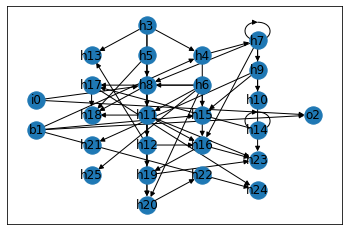

In [4]:
populationSize = 100
nDivisions = 15
nGenerations = 500

def fitnessFunc(genome):
    input = [n/nDivisions for n in range(nDivisions)]
    output = [genome.evaluate2([i], 10)[0] for i in input]
    refOut = [f(i) for i in input]
    diff = sum(abs(output[i]-refOut[i]) for i in range(nDivisions))
    if diff == 0:
        return float('inf')
    return 1 / diff

# Initialize population
population = [NeatGenome(1, 1) for _ in range(populationSize)]

# Introduce some genetic diversity
for i in population:
    for _ in range(2):
        i.mutate()

# Initialise genetic algorithm
evolver = GeneticAlgorithm(population, fitnessFunc)

# Evolve for a given number of generations
maxFitness, best = evolver.run(nGenerations, logGeneration)
print("Done!")
best.draw()
input = [n/nDivisions for n in range(nDivisions)]
output = [best.evaluate([i])[0] for i in input]
refOut = [f(i) for i in input]
print("Output: {}".format(output))

In [5]:
plotOutput(input, output, refOut)

alt.Chart(...)